# Homework for CLIM 680: Climate Data

**Shammunul Islam (sislam27@mason.edu)**

## Temperature ☀️ analysis of South-Asia using APHRODITE Water Resources project's data

I tried to visually explore temperature data of South Asia data provided by [APHRODITE Water Resources project](https://www.chikyu.ac.jp/precip/english/downloads.html?fbclid=IwAR1P-1G9nxc8SQV0WfF2cA7mnGvRjI5RDB3RfEhpNuGBh2-im35TPNzDVAM). Using Python along with XArray, Cartopy, matplotlib I visualized maps of temperature. A comparison of temperature between 1961 and 2015 is also made. I also made an attempt to understand how June, July, August, September (JJAS) temperature changed over time by making an animation map where at each step of the animation, average temperature of JJAS is plotted.

This repository will be continuously updated as the course will go on.

### Data Description -- The APHRODITE Water Resources project

The APHRODITE Water Resources project is working on a series of precipitation products and this project completed its first phase in 2010 and embarked on its second phase in 2016, partnering with Hirosaki University, Kyoto University, and Chiba University.

Daily mean temperature values are provided by their AphroTemp_V1808 at 0.50 and 0.25 degree grid resolutions. These readings are produced by extrapolating information from meteorological stations dispersed throughout the targeted area. After the release of AphroTemp_V1204R1, surface data from nations including India, Bhutan, Thailand, and Myanmar was included. The accuracy of the temperature readings in South Asia in the most recent version has been improved by this inclusion, along with updated interpolation methods and climatic data. For a better understanding of this dataset, you can refer to this [documentation](http://aphrodite.st.hirosaki-u.ac.jp/product/APHRO_V1808_TEMP/AphroTemp_V1808_readme.txt)

### The major characteristics of the dataset

- Spatial and Temporal Coverage

   * Spatial coverage      :  (MA) 60.0E - 150.0E, 15.0S - 55.0N
   * Spatial resolution    :  0.5 degree and 0.25 degree latitude/longitude
   * Temporal coverage     :  1961-2015
   * Temporal resolution   :  Daily

- Units
   * Daily mean temperature :  degC
   * Ratio of 0.05 grid box containing station(s) :  %

- Missing Code

   * Daily mean temperature :  -99.9
   * Ratio of 0.05 grid box containing station(s) :  -99.9

### Import all the necessary packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/HW_680/'

In [3]:
!pip install xarray
!pip install numpy
!pip install cartopy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.2 MB/s eta 0:00:00


In [4]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [ ]:
#!pip install --user cartopy

In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
fname = path+'APHRO_MA_TAVE_025deg_V1808.1961.nc.nc'
ds_1961 = xr.open_dataset(fname)
ds_1961

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280, time: 365)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 1961-12-31
Data variables:
    tave     (time, lat, lon) float32 ...
    rstn     (time, lat, lon) float32 ...
Attributes:
    title:    APHRO_MA V1808 daily temperature with 0.25deg grids

We see that this data has three coordinates, one corresponding to **lon** or longitude, **lat** or latitude and **time** which has 365 values or 365 days.

In [ ]:
ds_mean_1961=ds_1961.mean(dim='time')

In [ ]:
ds_mean_1961

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 280)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 149.1 149.4 149.6 149.9
  * lat      (lat) float64 -14.88 -14.62 -14.38 -14.12 ... 54.38 54.62 54.88
Data variables:
    tave     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    rstn     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

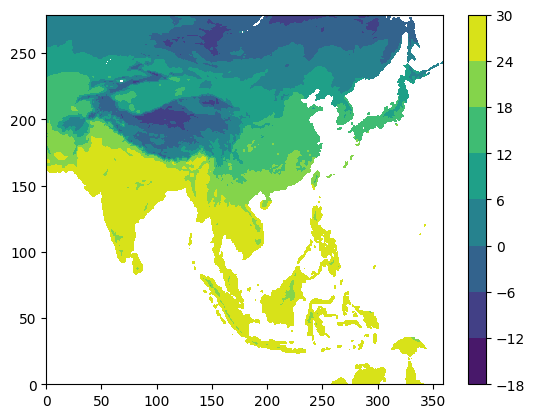

In [ ]:
plt.contourf(ds_mean_1961['tave'])
plt.colorbar() ;

''

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


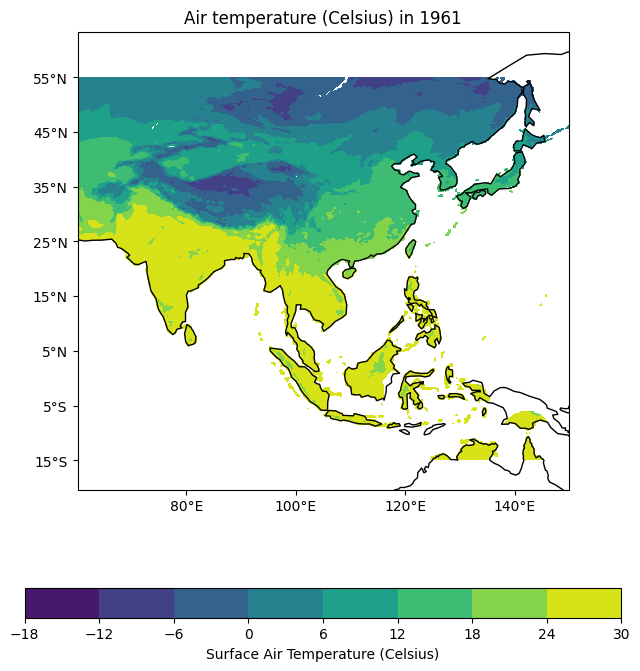

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean_1961['tave']
data, lons = add_cyclic_point(data, coord=ds_1961['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds_1961['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(60,181,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,62,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Define the longitude and latitude range
ax.set_extent([ds_mean_1961['lon'].min(), ds_mean_1961['lon'].max(), ds_mean_1961['lat'].min(), ds_mean_1961['lat'].max()])

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (Celsius)')
plt.title("Air temperature (Celsius) in 1961")
;

''

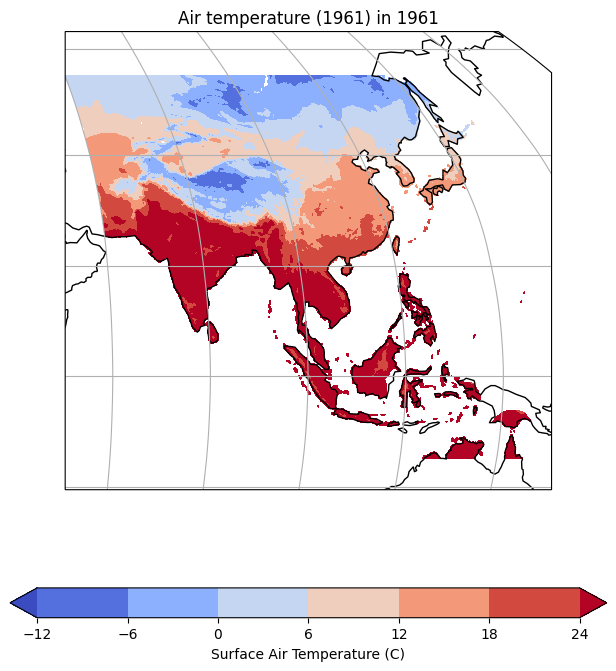

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean_1961['tave']
data, lons = add_cyclic_point(data, coord=ds_1961['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds_1961['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the longitude and latitude range
ax.set_extent([ds_mean_1961['lon'].min(), ds_mean_1961['lon'].max(), ds_mean_1961['lat'].min(), ds_mean_1961['lat'].max()])

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (C)')

# Add title
plt.title('Air temperature (1961) in 1961')
;

Now, let's have a look at the temperature from 2015 and try to see if the temperature pattern looks similar or not.

We start by loading dataset for 2015.

In [ ]:
fname = path+'APHRO_MA_TAVE_025deg_V1808.2015.nc.nc'
ds_2015 = xr.open_dataset(fname)

Create a mean of temperature for 2015.

In [ ]:
ds_mean_2015=ds_2015.mean(dim='time')

''

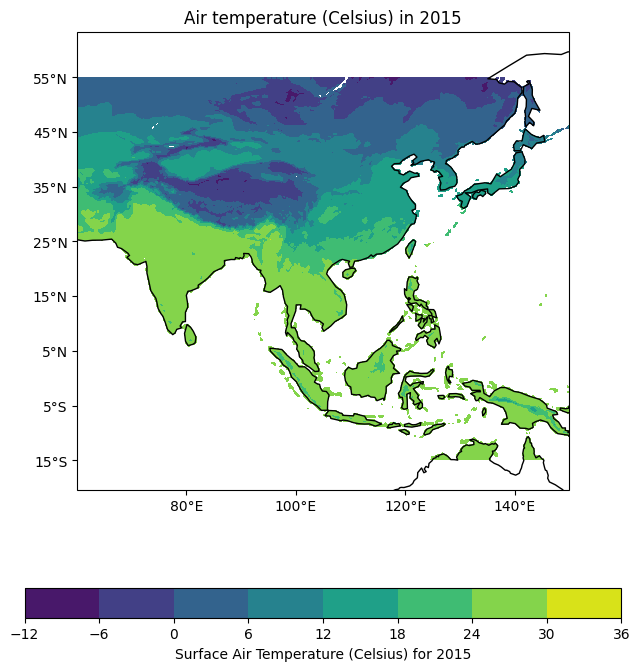

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean_2015['tave']
data, lons = add_cyclic_point(data, coord=ds_2015['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds_2015['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(60,181,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the longitude and latitude range
ax.set_extent([ds_mean_2015['lon'].min(), ds_mean_2015['lon'].max(), ds_mean_2015['lat'].min(), ds_mean_2015['lat'].max()])

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,62,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (Celsius) for 2015')
plt.title("Air temperature (Celsius) in 2015")
;

### Side-by-side plot comparison for 1961 and 2015

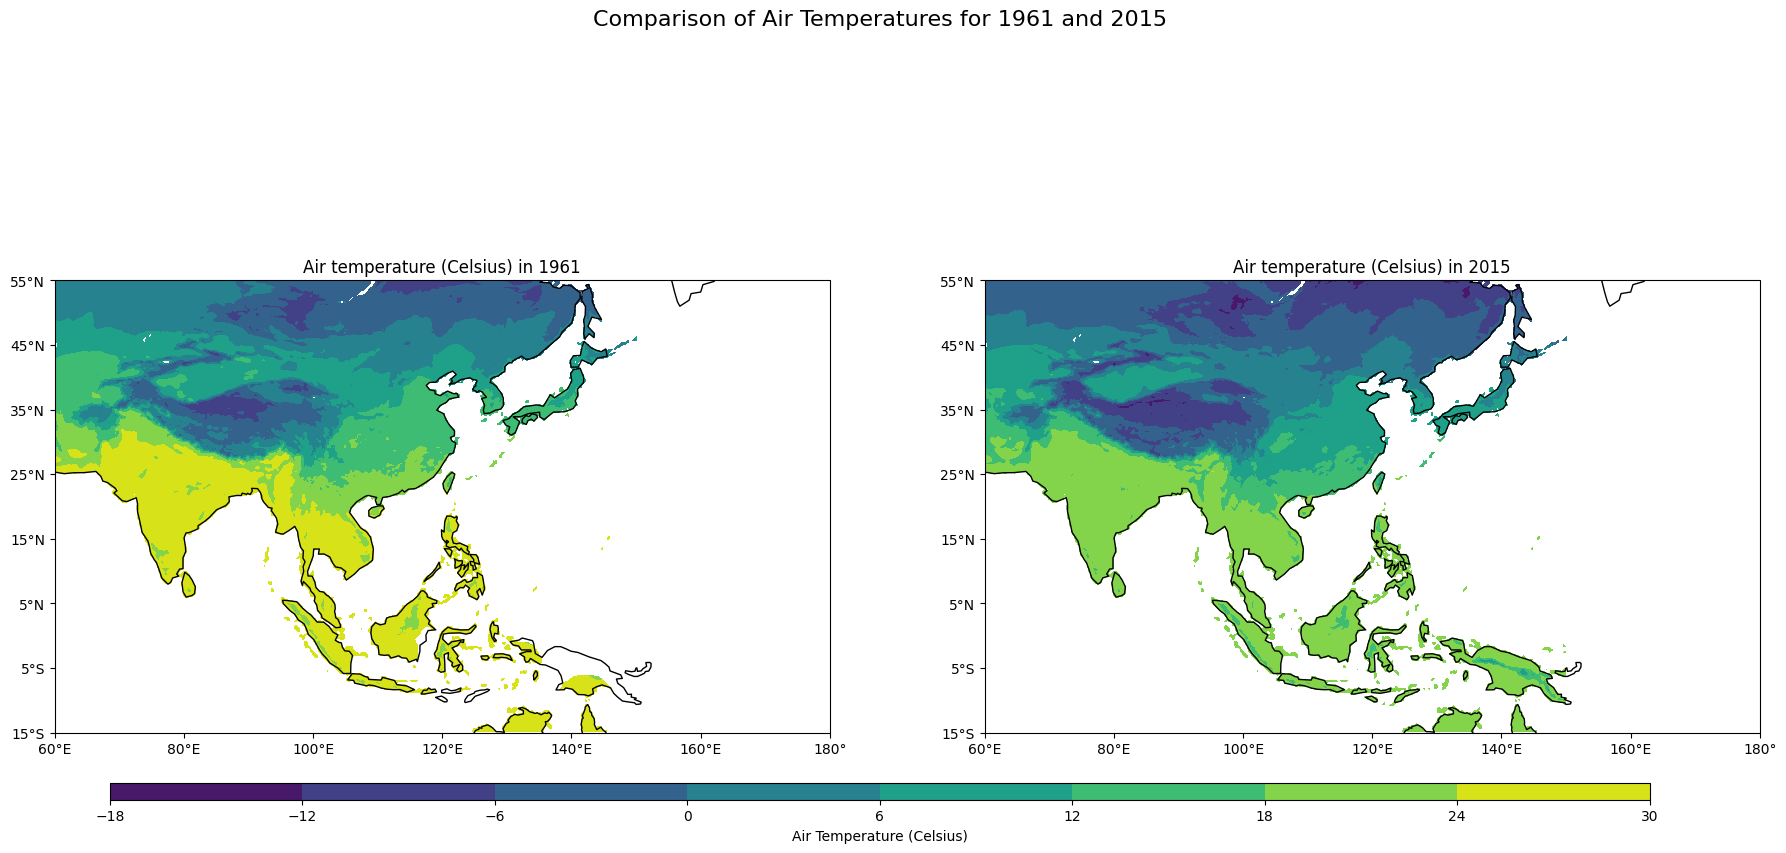

In [ ]:
# Create a 1x2 grid of subplots with shared colorbars
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(22,8.5),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for 1961
# Add cyclic point to data
data_1961 = ds_mean_1961['tave']
data_1961, lons_1961 = add_cyclic_point(data_1961, coord=ds_1961['lon'])

# Make a filled contour plot
cs1 = axs[0].contourf(lons_1961, ds_1961['lat'], data_1961,
                     transform=ccrs.PlateCarree())

# Add coastlines
axs[0].coastlines()

# Define the xticks for longitude and yticks for latitude
axs[0].set_xticks(np.arange(60, 181, 20), crs=ccrs.PlateCarree())
axs[0].set_yticks(np.arange(-15, 62, 10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
axs[0].xaxis.set_major_formatter(lon_formatter)
axs[0].yaxis.set_major_formatter(lat_formatter)

axs[0].set_title("Air temperature (Celsius) in 1961")

# Plot for 2015
# Add cyclic point to data
data_2015 = ds_mean_2015['tave']
data_2015, lons_2015 = add_cyclic_point(data_2015, coord=ds_1961['lon'])

# Make a filled contour plot
cs2 = axs[1].contourf(lons_2015, ds_1961['lat'], data_2015,
                     transform=ccrs.PlateCarree())

# Add coastlines
axs[1].coastlines()

# Define the xticks for longitude and yticks for latitude
axs[1].set_xticks(np.arange(60, 181, 20), crs=ccrs.PlateCarree())
axs[1].set_yticks(np.arange(-15, 62, 10), crs=ccrs.PlateCarree())
axs[1].xaxis.set_major_formatter(lon_formatter)
axs[1].yaxis.set_major_formatter(lat_formatter)

# Set title for the second plot
axs[1].set_title("Air temperature (Celsius) in 2015")


# Define the longitude and latitude range
ax.set_extent([ds_mean_2015['lon'].min(), ds_mean_2015['lon'].max(), ds_mean_2015['lat'].min(), ds_mean_2015['lat'].max()])


# Add main title/heading for the entire figure
fig.suptitle("Comparison of Air Temperatures for 1961 and 2015", fontsize=16, y=1.08)



# Add a single colorbar for both plots
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.02])
cbar = fig.colorbar(cs1, cax=cbar_ax, orientation='horizontal', label='Air Temperature (Celsius)')

### Anomaly plot for the change between 2015 and 1961

''

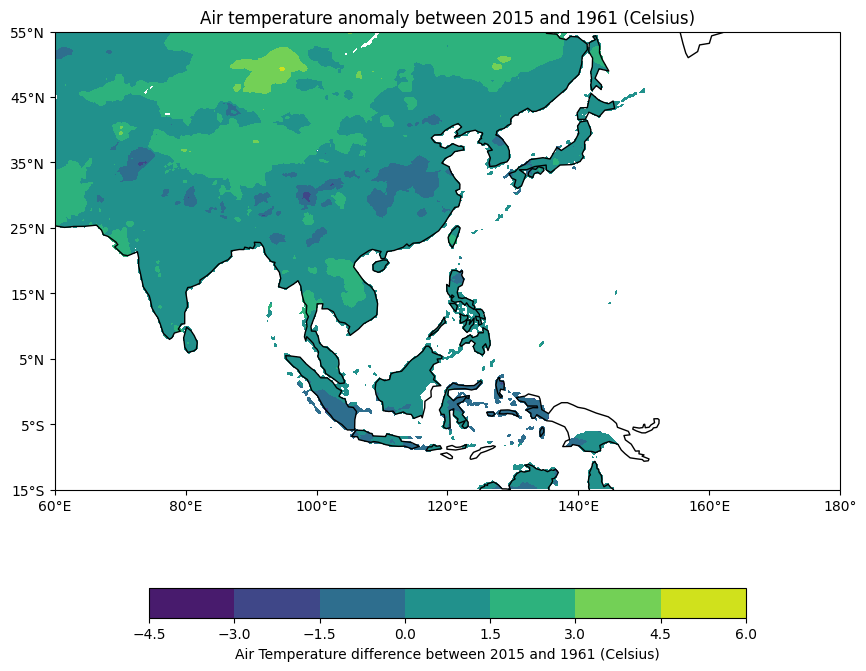

In [ ]:
anomaly = ds_mean_2015 - ds_mean_1961
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=anomaly['tave']
data, lons = add_cyclic_point(data, coord=ds_2015['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, ds_2015['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(60,181,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,62,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Air Temperature difference between 2015 and 1961 (Celsius)')
plt.title("Air temperature anomaly between 2015 and 1961 (Celsius)")
;

### Animation of June, July, August, September temperature from 1961 to 2015

The code below didn't work in Colab but worked well in Jupyter Notebook.

```Python
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a function to extract JJAS data from a given file
def extract_JJAS_data(filename):
    ds = xr.open_dataset(filename)
    jjas_data = ds['tave'].sel(time=ds['time.month'].isin([6,7,8,9])).mean(dim='time')
    return jjas_data

# Create a function to plot data for a given year
def plot_data(data, ax):
    lons, lats = np.meshgrid(data['lon'], data['lat'])
    cs = ax.contourf(lons, lats, data, transform=ccrs.PlateCarree())
    return cs

# Create the initial figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Load the first dataset to initialize the colorbar
initial_data = extract_JJAS_data("APHRO_MA_TAVE_025deg_V1808.1961.nc.nc")
cs = plot_data(initial_data, ax)

# Adjust the colorbar to align with the map's extent
cbar_ax = fig.add_axes([0.125, 0.1, 0.775, 0.03])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Temperature (Celsius)')

# Create a function to update the plot for the animation
def update_plot(year):
    ax.clear()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    filename = f"APHRO_MA_TAVE_025deg_V1808.{year}.nc.nc"
    data = extract_JJAS_data(filename)
    cs = plot_data(data, ax)
    
    # Adjust the extent of the map to fit the data boundaries
    ax.set_extent([data['lon'].min(), data['lon'].max(), data['lat'].min(), data['lat'].max()])
    
    # Update the colorbar with new data
    cbar.mappable.set_array(data)
    cbar.mappable.set_clim(data.min(), data.max())
    
    # Add a title for the year
    ax.set_title(f"JJAS Average Temperature for {year}")
    return cs

# Create the animation
years = range(1961, 2016)
ani = animation.FuncAnimation(fig, update_plot, frames=years, repeat=True, blit=False)

# Save the animation as a .gif
ani.save('animation.gif', writer='imagemagick', fps=1.8)

plt.show()
```

The resulting animation looks like below:

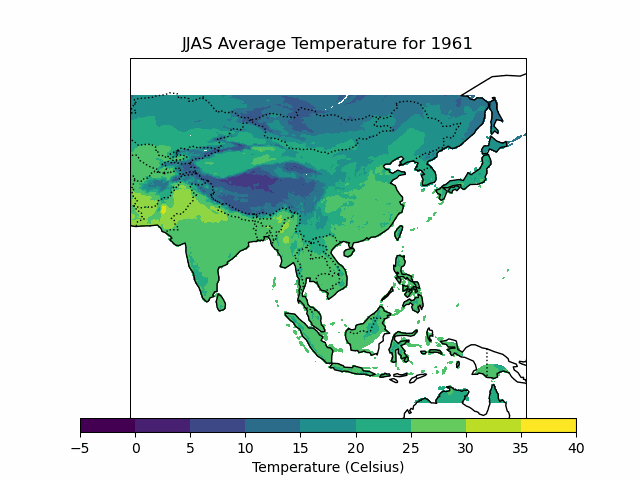

In [10]:
image = path+'animation.gif'
from IPython.display import Image
Image(open(image, 'rb').read())  # local